Nathan's analysis using the imputed data set.

In [1]:
import pandas as pd

In [2]:
url = r'https://raw.githubusercontent.com/NRSchaaf/Railroad_Accidents/refs/heads/main/RR_Accident_Weather_Data_Imputed.csv'
data_set = pd.read_csv(url)

Basic Analysis

In [3]:
data_set.head()

,reportingrailroadcode,accidentnumber,date,time,accidenttype,hazmatreleasedcars,station,stateabbr,temperature,visibility_code,...,trainspeed,equipmentdamagecost,trackdamagecost,totaldamagecost,primaryaccidentcausecode,latitude,longitude,prior_temp,actual_temp,following_temp
0,CSX,000178042,8/7/2018,10:51 AM,Derailment,0,BUFFALO,NY,73,2,...,6,19801,1440,21241,T001,42.901973,-78.773441,79.3,75.1,72.4
1,CSX,000182665,4/30/2019,12:25 AM,Derailment,0,MILLBURY,OH,42,4,...,7,21848,1017,22865,T111,41.544006,-83.485654,44.3,45.5,56.6
2,CSX,000138406,12/3/2014,11:45 PM,Derailment,0,PARMA,OH,35,4,...,7,20456,500,20956,T110,41.406978,-81.787482,30.0,34.7,30.4
3,CSX,000188525,2/19/2020,8:44 AM,Derailment,0,CINCINNATI,OH,25,2,...,0,84949,0,625123,T207,39.125335,-84.540044,48.2,34.9,29.7
4,CSX,000175393,3/24/2018,10:53 AM,Derailment,0,LIMA,OH,36,2,...,7,115993,0,196239,T311,40.745354,-84.101095,33.6,31.3,31.8


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4595 entries, 0 to 4594
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   reportingrailroadcode     4595 non-null   object 
 1   accidentnumber            4595 non-null   object 
 2   date                      4595 non-null   object 
 3   time                      4595 non-null   object 
 4   accidenttype              4595 non-null   object 
 5   hazmatreleasedcars        4595 non-null   int64  
 6   station                   4595 non-null   object 
 7   stateabbr                 4595 non-null   object 
 8   temperature               4595 non-null   int64  
 9   visibility_code           4595 non-null   int64  
 10  visibility                4595 non-null   object 
 11  weathercondition          4595 non-null   object 
 12  tracktype                 4595 non-null   object 
 13  equipmenttype             4595 non-null   object 
 14  trainspe

In [5]:
count_nan = data_set.isna().sum()
count_nan

reportingrailroadcode       0
accidentnumber              0
date                        0
time                        0
accidenttype                0
hazmatreleasedcars          0
station                     0
stateabbr                   0
temperature                 0
visibility_code             0
visibility                  0
weathercondition            0
tracktype                   0
equipmenttype               0
trainspeed                  0
equipmentdamagecost         0
trackdamagecost             0
totaldamagecost             0
primaryaccidentcausecode    0
latitude                    0
longitude                   0
prior_temp                  0
actual_temp                 0
following_temp              0
dtype: int64

In [6]:
data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
hazmatreleasedcars,4595.0,0.028945,0.526021,0.00000,0.000000,0.000000,0.000000,2.800000e+01
temperature,4595.0,58.926877,22.587870,-35.00000,41.000000,60.000000,77.000000,1.150000e+02
visibility_code,4595.0,2.660936,1.035686,1.00000,2.000000,2.000000,4.000000,4.000000e+00
trainspeed,4595.0,9.551687,12.077753,0.00000,4.000000,6.000000,9.000000,1.250000e+02
equipmentdamagecost,4595.0,114259.902938,448682.514449,0.00000,5282.500000,19123.000000,63174.500000,2.194712e+07
trackdamagecost,4595.0,67180.249837,202218.147279,0.00000,1857.000000,12000.000000,47450.000000,4.600000e+06
totaldamagecost,4595.0,208355.717954,664294.973831,0.00000,20940.500000,48135.000000,144222.500000,2.201925e+07
latitude,4595.0,37.919532,5.213919,0.00000,33.741081,39.110705,41.412739,4.901675e+01
longitude,4595.0,-92.067926,15.604322,-683.19219,-97.353523,-90.605520,-83.505282,0.000000e+00
prior_temp,4595.0,57.591077,19.029285,-16.80000,42.150000,59.700000,74.100000,1.002000e+02


### Data Transformations

Calculate Temperature Fluctuations

In [7]:
# Calculate the new temperature change features
data_set['before_temp_change'] = data_set['actual_temp'] - data_set['prior_temp']
data_set['after_temp_change'] = data_set['following_temp'] - data_set['actual_temp']
data_set['span_temp_change'] = data_set['following_temp'] - data_set['prior_temp']

Categorize Temperature<br>
<= 32 is "Cold"<br>
32 < 85 is "Moderate" <br>
\>= 85 is "Hot"

In [8]:
# Define the temperature bins and labels
bins = [-float('inf'), 32, 85, float('inf')]  # Using -inf and inf to cover all ranges
labels = ['Cold', 'Moderate', 'Hot']

# Create a new column for temperature categories
data_set['temp_category'] = pd.cut(data_set['actual_temp'], bins=bins, labels=labels, right=True)

Date Conversion

In [9]:
# Convert the 'date' column to datetime format
data_set['date'] = pd.to_datetime(data_set['date'], format='%m/%d/%Y')

# Convert the 'time' column to datetime format (with a specific date to keep it as a timestamp)
data_set['time'] = pd.to_datetime(data_set['time'], format='%I:%M %p').dt.time  # note this is 24-hour time stamp format

Normalize Numerical Data

In [10]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns to normalize
numerical_cols = ['hazmatreleasedcars', 'temperature', 'trainspeed', 'equipmentdamagecost', 'trackdamagecost', 'totaldamagecost']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
data_set[numerical_cols] = scaler.fit_transform(data_set[numerical_cols])

# Display the normalized data
#data_set[numerical_cols].head()

### Exploratory Data Analysis (EDA)

Temperature Fluctuations vs. Number of Incidents

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate incident counts based on unique temperature change values
data_set['incident_count'] = data_set.groupby(['before_temp_change', 'after_temp_change', 'span_temp_change'])['accidentnumber'].transform('count')

C:\Users\natha\AppData\Local\Temp\ipykernel_28692\4280429893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='incident_count', y='before_temp_change', data=data_set, palette="Blues")


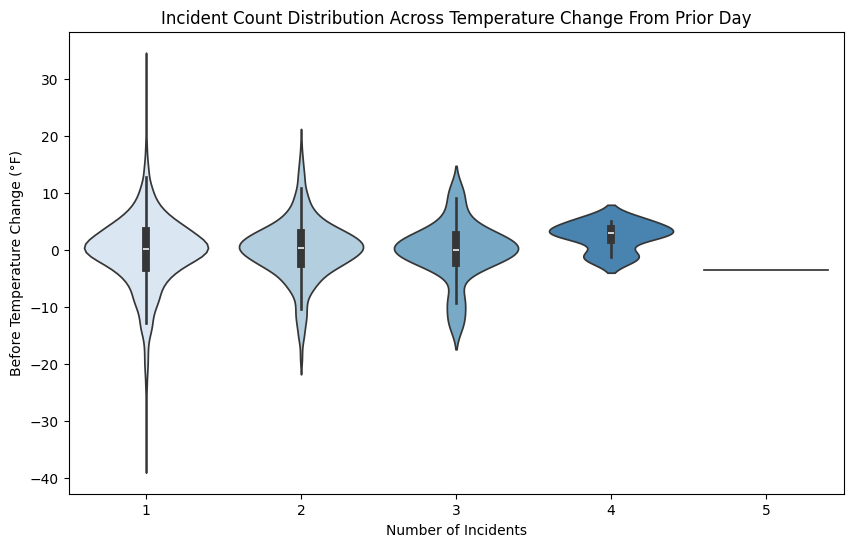

C:\Users\natha\AppData\Local\Temp\ipykernel_28692\4280429893.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='incident_count', y='after_temp_change', data=data_set, palette="Oranges")


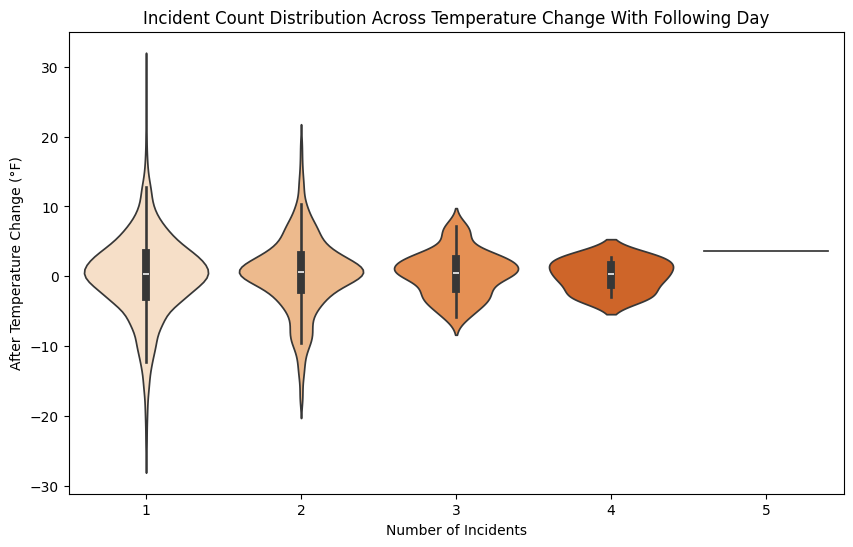

C:\Users\natha\AppData\Local\Temp\ipykernel_28692\4280429893.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='incident_count', y='span_temp_change', data=data_set, palette="Greens")


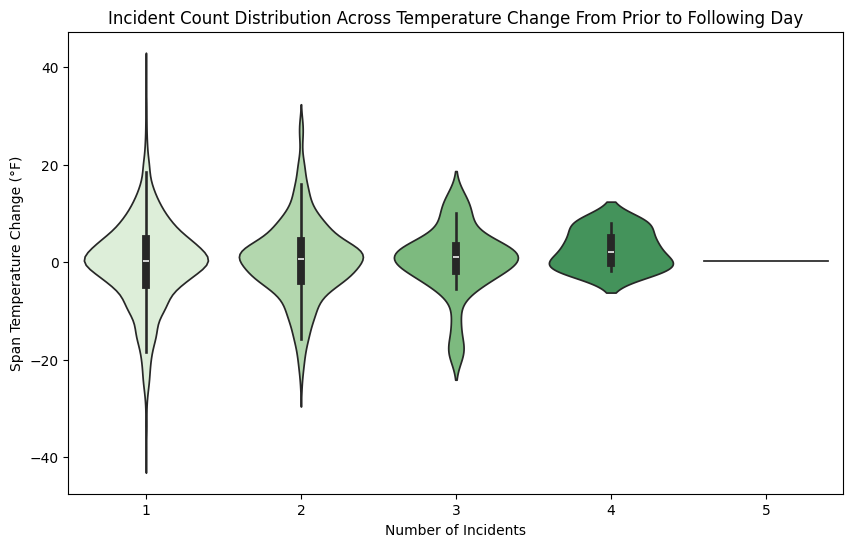

In [12]:
# Violin plot for 'before_temp_change' vs. incidents
plt.figure(figsize=(10, 6))
sns.violinplot(x='incident_count', y='before_temp_change', data=data_set, palette="Blues")
plt.title("Incident Count Distribution Across Temperature Change From Prior Day")
plt.xlabel("Number of Incidents")
plt.ylabel("Before Temperature Change (°F)")
plt.show()

# Violin plot for 'after_temp_change' vs. incidents
plt.figure(figsize=(10, 6))
sns.violinplot(x='incident_count', y='after_temp_change', data=data_set, palette="Oranges")
plt.title("Incident Count Distribution Across Temperature Change With Following Day")
plt.xlabel("Number of Incidents")
plt.ylabel("After Temperature Change (°F)")
plt.show()

# Violin plot for 'span_temp_change' vs. incidents
plt.figure(figsize=(10, 6))
sns.violinplot(x='incident_count', y='span_temp_change', data=data_set, palette="Greens")
plt.title("Incident Count Distribution Across Temperature Change From Prior to Following Day")
plt.xlabel("Number of Incidents")
plt.ylabel("Span Temperature Change (°F)")
plt.show()

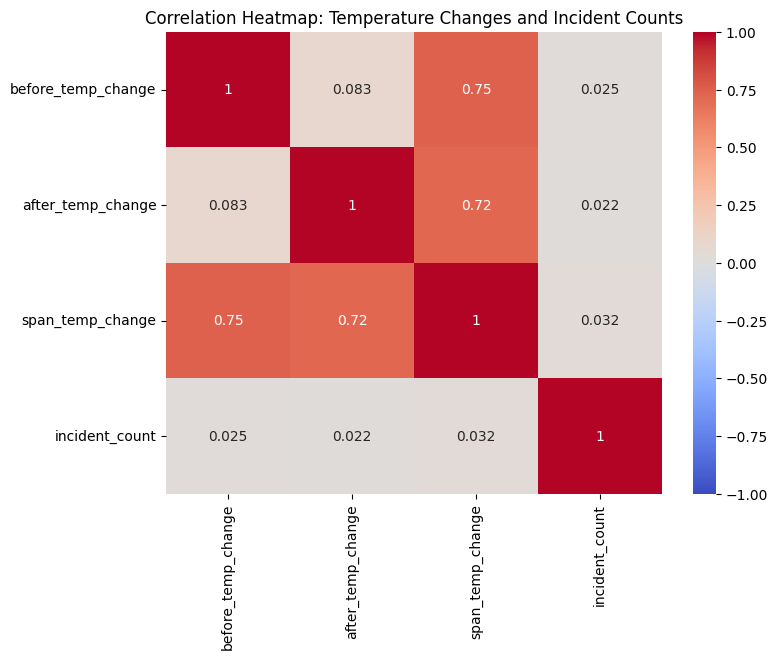

In [13]:
# Select relevant features for correlation analysis
correlation_features = data_set[['before_temp_change', 'after_temp_change', 'span_temp_change', 'incident_count']]

# Calculate the correlation matrix
correlation_matrix = correlation_features.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Temperature Changes and Incident Counts")
plt.show()

Statistical Analysis

In [31]:
# List of columns you want to describe
columns_to_describe = ['prior_temp', 'actual_temp', 'following_temp', 'before_temp_change', 'after_temp_change', 'span_temp_change']

data_set[columns_to_describe].describe().T


,count,mean,std,min,25%,50%,75%,max
prior_temp,4595.0,57.591077,19.029285,-16.8,42.15,59.7,74.10,100.2
actual_temp,4595.0,57.371121,19.353664,-18.8,42.10,59.2,74.00,100.1
following_temp,4595.0,57.465484,19.380081,-21.2,42.70,59.1,74.40,102.9
before_temp_change,4595.0,-0.219956,6.031109,-36.6,-2.90,0.2,3.20,32.2
after_temp_change,4595.0,0.094363,5.768764,-25.8,-2.80,0.5,3.25,29.7
span_temp_change,4595.0,-0.125593,8.686951,-39.7,-4.30,0.4,4.60,39.5


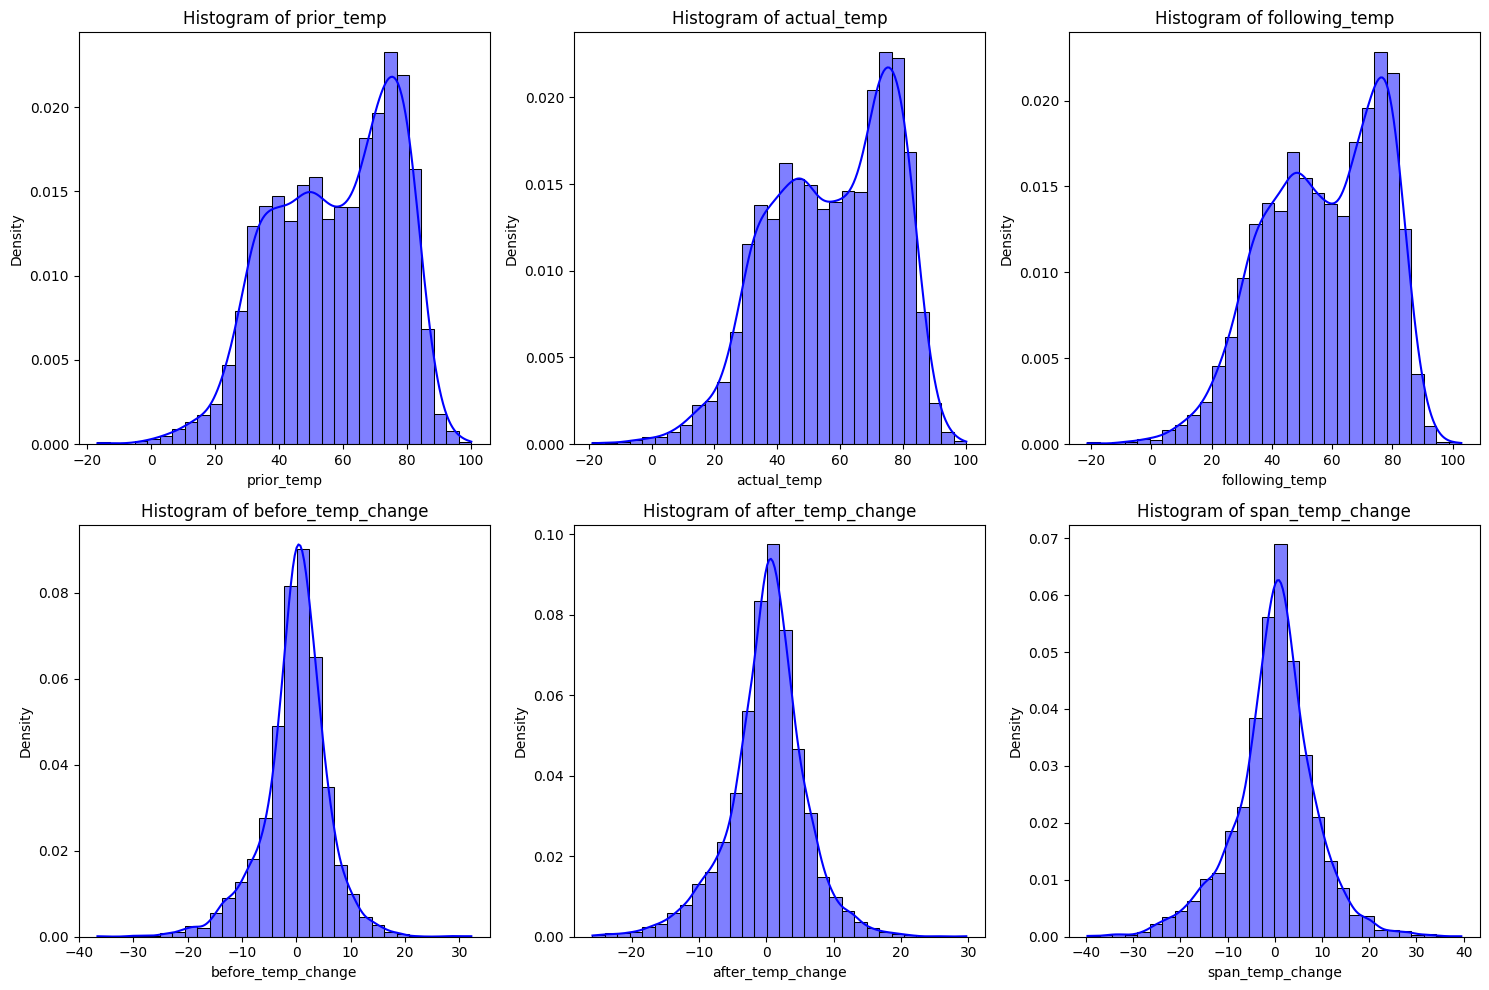

In [32]:
# List of columns to plot
columns_to_plot = ['prior_temp', 'actual_temp', 'following_temp', 
                   'before_temp_change', 'after_temp_change', 'span_temp_change']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through each column and create a histogram
for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns of subplots
    sns.histplot(data_set[column], bins=30, kde=True, color='blue', stat='density')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

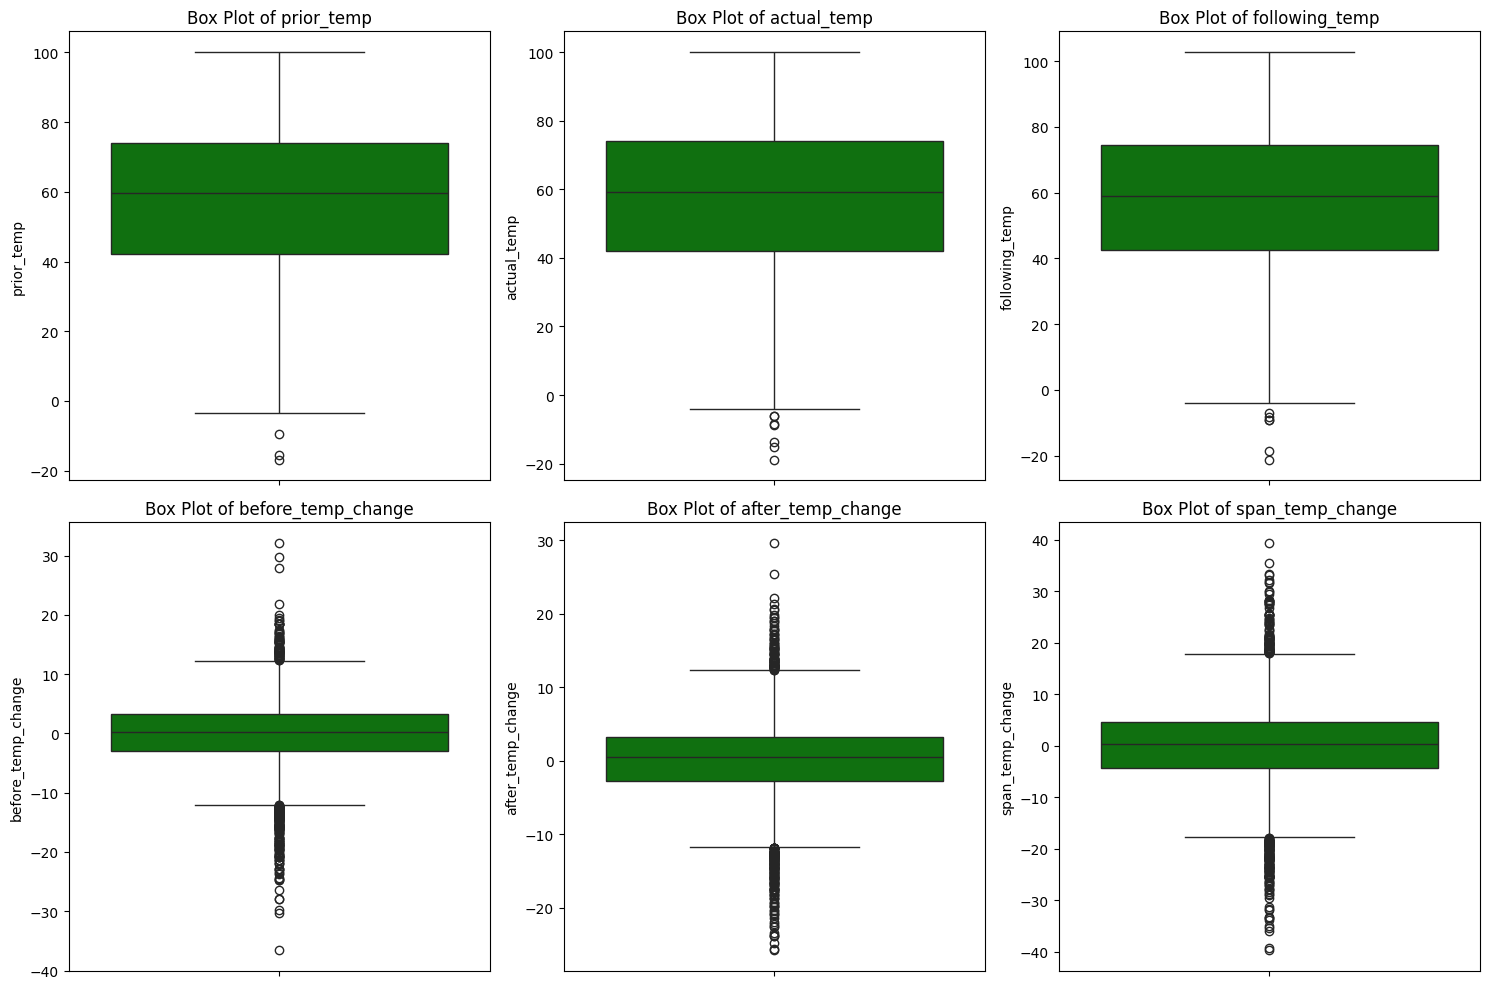

In [33]:
# Set up the matplotlib figure for box plots
plt.figure(figsize=(15, 10))

# Loop through each column and create a box plot
for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns of subplots
    sns.boxplot(y=data_set[column], color='green')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [35]:
# Group by 'temp_category' and count the number of incidents
incident_counts_by_category = data_set.groupby('temp_category')['incident_count'].sum().reset_index()

# Rename columns for clarity
incident_counts_by_category.columns = ['Temperature Category', 'Total Incidents']

# Display the counts
incident_counts_by_category

C:\Users\natha\AppData\Local\Temp\ipykernel_28692\3026050313.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  incident_counts_by_category = data_set.groupby('temp_category')['incident_count'].sum().reset_index()


,Temperature Category,Total Incidents
0,Cold,618
1,Moderate,4904
2,Hot,195


C:\Users\natha\AppData\Local\Temp\ipykernel_28692\4063687843.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Temperature Category', y='Total Incidents', data=incident_counts_by_category, palette="viridis")


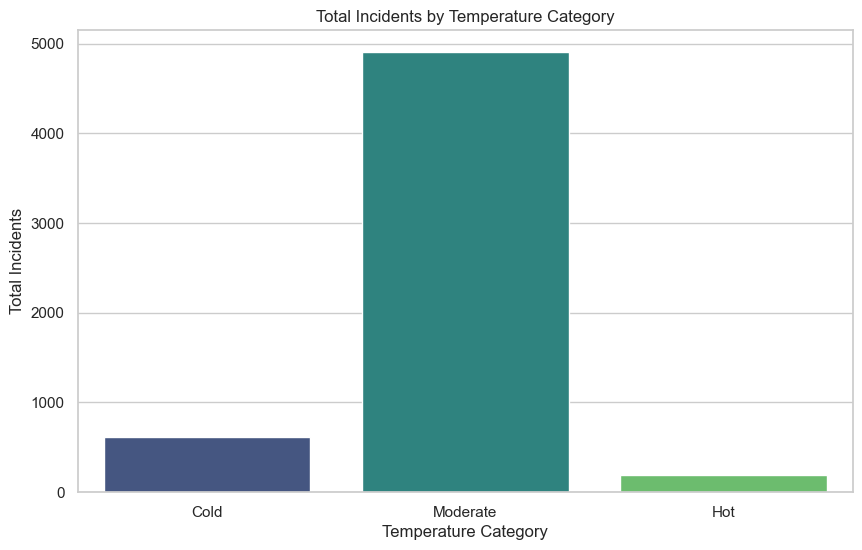

In [37]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Bar plot for incidents by temperature category
plt.figure(figsize=(10, 6))
sns.barplot(x='Temperature Category', y='Total Incidents', data=incident_counts_by_category, palette="viridis")
plt.title("Total Incidents by Temperature Category")
plt.xlabel("Temperature Category")
plt.ylabel("Total Incidents")
plt.show()

### Analysis for Impact of Temperature Fluctuations on Incidents

Correlation Analysis

Explanation<br>
Pearson Correlation: This will give you a value between -1 and 1, where:<br>
1 indicates a perfect positive linear relationship.<br>
-1 indicates a perfect negative linear relationship.<br>
0 indicates no linear relationship.<br>
Spearman Correlation: This is useful if your data doesn't meet the assumptions of normality required for Pearson correlation. It assesses how well the relationship between two variables can be described using a monotonic function.

In [39]:
# Calculate the correlation coefficient (Pearson)
correlation_pearson = data_set['before_temp_change'].corr(data_set['incident_count'], method='pearson')
print(f"Pearson Correlation Coefficient: {correlation_pearson}")

# Calculate the correlation coefficient (Spearman)
correlation_spearman = data_set['before_temp_change'].corr(data_set['incident_count'], method='spearman')
print(f"Spearman Correlation Coefficient: {correlation_spearman}")

Pearson Correlation Coefficient: 0.02498306987216463
Spearman Correlation Coefficient: 0.01332575428828991


In [40]:
# Calculate the correlation coefficient (Pearson)
correlation_pearson = data_set['after_temp_change'].corr(data_set['incident_count'], method='pearson')
print(f"Pearson Correlation Coefficient: {correlation_pearson}")

# Calculate the correlation coefficient (Spearman)
correlation_spearman = data_set['after_temp_change'].corr(data_set['incident_count'], method='spearman')
print(f"Spearman Correlation Coefficient: {correlation_spearman}")

Pearson Correlation Coefficient: 0.022446247933454722
Spearman Correlation Coefficient: 0.015671800159992096


In [38]:
# Calculate the correlation coefficient (Pearson)
correlation_pearson = data_set['span_temp_change'].corr(data_set['incident_count'], method='pearson')
print(f"Pearson Correlation Coefficient: {correlation_pearson}")

# Calculate the correlation coefficient (Spearman)
correlation_spearman = data_set['span_temp_change'].corr(data_set['incident_count'], method='spearman')
print(f"Spearman Correlation Coefficient: {correlation_spearman}")

Pearson Correlation Coefficient: 0.03225098333923373
Spearman Correlation Coefficient: 0.02122419169536886


### Analysis for Extreme Temperatures Impact on Incidents

In [42]:
# Calculate Incident Rates
incident_counts_by_threshold = data_set.groupby('temp_category')['incident_count'].agg(['sum', 'count']).reset_index()
incident_counts_by_threshold.columns = ['Temperature Category', 'Total Incidents', 'Total Counts']
incident_counts_by_threshold['Incident Rate'] = incident_counts_by_threshold['Total Incidents'] / incident_counts_by_threshold['Total Counts']

# Display the incident rates
incident_counts_by_threshold

C:\Users\natha\AppData\Local\Temp\ipykernel_28692\799991175.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  incident_counts_by_threshold = data_set.groupby('temp_category')['incident_count'].agg(['sum', 'count']).reset_index()


,Temperature Category,Total Incidents,Total Counts,Incident Rate
0,Cold,618,502,1.231076
1,Moderate,4904,3942,1.244039
2,Hot,195,151,1.291391


There is a slightly higer avaerage number of incident occuring in the HOT category compared to the others, even though they have a lower total of incidents.

In [44]:
# Chi-Squared Test
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data_set['temp_category'], data_set['incident_count'] > 0)  # True if incident occurred

# Perform the Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi-Squared Statistic: 0.0
P-Value: 1.0
Degrees of Freedom: 0
Expected Frequencies: 
[[ 502.]
 [3942.]
 [ 151.]]


Chi-Squared Statistic: 0.0<br>
This indicates that there is no difference between the observed and expected frequencies. In other words, the temperature categories do not show any variation in incident occurrences.<br>
<br>
P-Value: 1.0<br>
A P-value of 1.0 suggests that there is no statistically significant relationship between temperature categories and the number of incidents. This means that any observed differences are likely due to random chance rather than a true association.<br>
<br>
Degrees of Freedom: 0<br>
Degrees of freedom of 0 typically indicates that there is only one category present for the variable being tested. This situation arises when the data lacks variation in one of the categorical variables. In this case, it suggests that there may not be enough variability in your temperature categories or incident counts to conduct a meaningful Chi-Squared test.<br>
<br>
Expected Frequencies:<br>
The expected frequencies suggest what the counts would be if there were no relationship between the temperature categories and incident occurrences. They reflect how many incidents we would expect in each category if they were uniformly distributed:<br>
Cold: 502<br>
Moderate: 3942<br>
Hot: 151<br>

# one last thing to try... bin the span_temp findings and process